### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from lib_file import lib_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data Loading

In [2]:
df=pd.read_csv("cleaned_data.csv")

In [3]:
df.shape

(10000, 2)

In [4]:
df.head()

,cleaned_text,sentiment
0,that is awsome you might know jay awada,Positive
1,quotohh o stop biting me ohhh the humanity o ...,Positive
2,in bed now alone lol,Negative
3,time to sleep nyt socal see yah in 3 weekshav...,Positive
4,true luxury has evolved into something called ...,Positive


In [5]:
tok=Tokenizer()
tok.fit_on_texts(df["cleaned_text"])

In [6]:
num_data=tok.texts_to_sequences(df["cleaned_text"])
print(num_data[:5])

[[16, 4, 1507, 6, 274, 53, 2791, 5580], [5581, 622, 315, 5582, 18, 1246, 3, 5583, 622, 186, 28, 10, 2265, 77, 14, 3, 5584], [12, 111, 32, 469, 64], [49, 2, 96, 2792, 5585, 83, 1947, 12, 193, 5586, 5, 1048, 802, 127, 599], [470, 2266, 72, 5587, 200, 169, 461, 2793, 6, 53, 283, 39, 5588, 242, 39, 1702, 8, 3671]]


In [7]:
vocab_size=len(tok.word_index)+1
print("Unique tokens size are {}.".format(vocab_size))

Unique tokens size are 15120.


In [8]:
tok.word_index.items()

dict_items([('i', 1), ('to', 2), ('the', 3), ('is', 4), ('a', 5), ('you', 6), ('it', 7), ('and', 8), ('my', 9), ('not', 10), ('for', 11), ('in', 12), ('am', 13), ('of', 14), ('have', 15), ('that', 16), ('on', 17), ('me', 18), ('but', 19), ('do', 20), ('so', 21), ('are', 22), ('just', 23), ('be', 24), ('at', 25), ('with', 26), ('up', 27), ('will', 28), ('was', 29), ('this', 30), ('good', 31), ('now', 32), ('going', 33), ('all', 34), ('day', 35), ('out', 36), ('get', 37), ('work', 38), ('like', 39), ('go', 40), ('no', 41), ('today', 42), ('cannot', 43), ('your', 44), ('got', 45), ('too', 46), ('what', 47), ('from', 48), ('time', 49), ('about', 50), ('we', 51), ('one', 52), ('know', 53), ('back', 54), ('did', 55), ('love', 56), ('had', 57), ('want', 58), ('morning', 59), ('as', 60), ('some', 61), ('new', 62), ('can', 63), ('lol', 64), ('really', 65), ('would', 66), ('if', 67), ('there', 68), ('well', 69), ('they', 70), ('more', 71), ('has', 72), ('how', 73), ('night', 74), ('still', 75), 

In [9]:
with open(file="models/tokens.pkl",mode="wb") as file:
    pickle.dump(obj=tok,file=file)

In [13]:
pad_text=pad_sequences(sequences=num_data,maxlen=50,padding="post",truncating="post")

In [14]:
pad_text[:5]

array([[  16,    4, 1507,    6,  274,   53, 2791, 5580,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [5581,  622,  315, 5582,   18, 1246,    3, 5583,  622,  186,   28,
          10, 2265,   77,   14,    3, 5584,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  12,  111,   32,  469,   64,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [15]:
df.head()

,cleaned_text,sentiment
0,that is awsome you might know jay awada,Positive
1,quotohh o stop biting me ohhh the humanity o ...,Positive
2,in bed now alone lol,Negative
3,time to sleep nyt socal see yah in 3 weekshav...,Positive
4,true luxury has evolved into something called ...,Positive


In [16]:
class_labels=df['sentiment'].unique().tolist()
class_labels.sort()
print(class_labels)

['Negative', 'Positive']


In [17]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'Negative': 0, 'Positive': 1}


In [18]:
df['sentiment']=df['sentiment'].map(class_dict)
df.head()

,cleaned_text,sentiment
0,that is awsome you might know jay awada,1
1,quotohh o stop biting me ohhh the humanity o ...,1
2,in bed now alone lol,0
3,time to sleep nyt socal see yah in 3 weekshav...,1
4,true luxury has evolved into something called ...,1


In [19]:
y=df['sentiment'].values
print(y.tolist())

[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 

In [20]:
embeddings_index = {}
from numpy import concatenate as ss
with open('input/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index)+1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = embedding_matrix_creater(50, word_index=tok.word_index)
print("Glove Loded!")
def split_data(X,y,t_size=0.2):
    X__,X_,y__,y_=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
    print(X__.shape, X_.shape, y__.shape, y_.shape)
    return ss((X__,X_)),X_,ss((y__,y_)),y_

Glove Loded!


### Data Splitting

In [21]:
y=to_categorical(y)
X_train,X_test,y_train,y_test=split_data(pad_text,y)

(8000, 50) (2000, 50) (8000, 2) (2000, 2)


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Flatten,Embedding,Bidirectional
from tensorflow.keras.optimizers import Adam

In [23]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=pad_text.shape[1],weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(units=100,return_sequences=True,dropout=0.4)))
model.add(Bidirectional(LSTM(units=100,return_sequences=True,dropout=0.4)))
model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(len(class_labels),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            756000    
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 200)           240800    
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dropout (Dropout)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
number_of_epochs=10
history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=number_of_epochs,validation_data=(X_test,y_test))

Epoch 1/10
313/313 [==============================] - 40s 78ms/step - loss: 0.6359 - accuracy: 0.6345 - val_loss: 0.5401 - val_accuracy: 0.7240
Epoch 2/10
313/313 [==============================] - 9s 28ms/step - loss: 0.5517 - accuracy: 0.7210 - val_loss: 0.5028 - val_accuracy: 0.7520
Epoch 3/10
313/313 [==============================] - 6s 18ms/step - loss: 0.4869 - accuracy: 0.7683 - val_loss: 0.4008 - val_accuracy: 0.8240
Epoch 4/10
313/313 [==============================] - 6s 21ms/step - loss: 0.4301 - accuracy: 0.8029 - val_loss: 0.3444 - val_accuracy: 0.8670
Epoch 5/10
313/313 [==============================] - 8s 24ms/step - loss: 0.3793 - accuracy: 0.8340 - val_loss: 0.2865 - val_accuracy: 0.8880
Epoch 6/10
313/313 [==============================] - 8s 27ms/step - loss: 0.3227 - accuracy: 0.8617 - val_loss: 0.2189 - val_accuracy: 0.9145
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.2827 - accuracy: 0.8821 - val_loss: 0.1756 - val_accuracy: 0.935

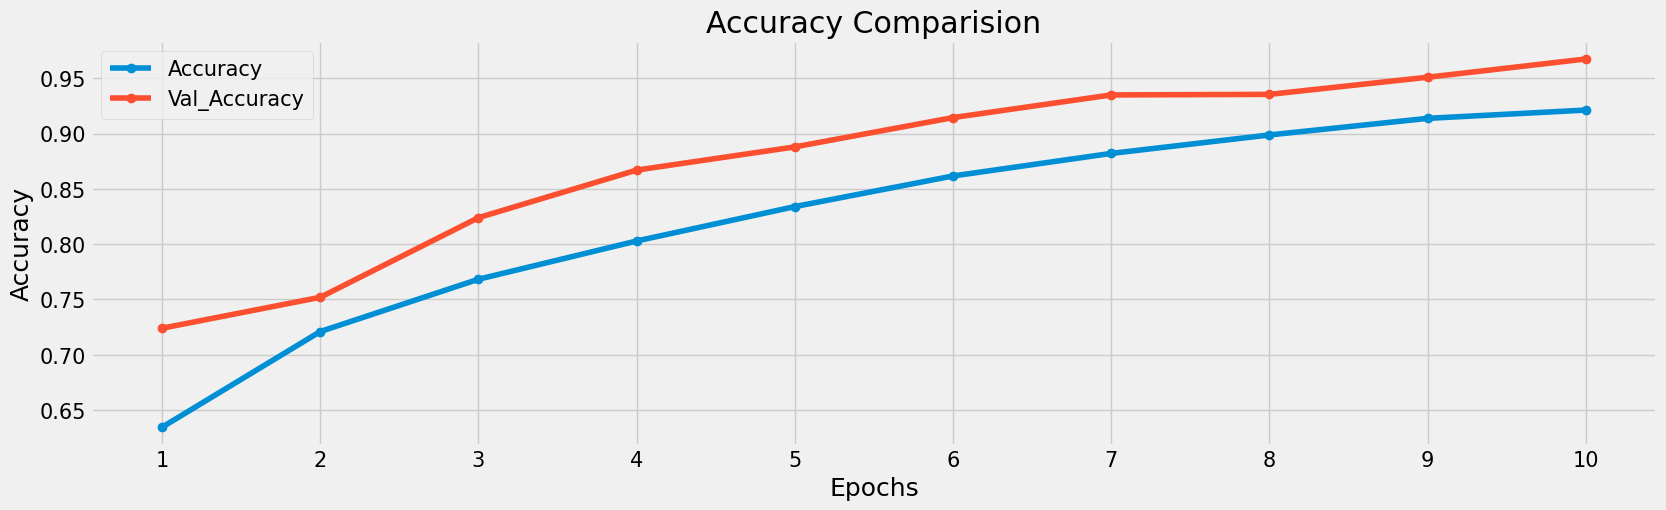

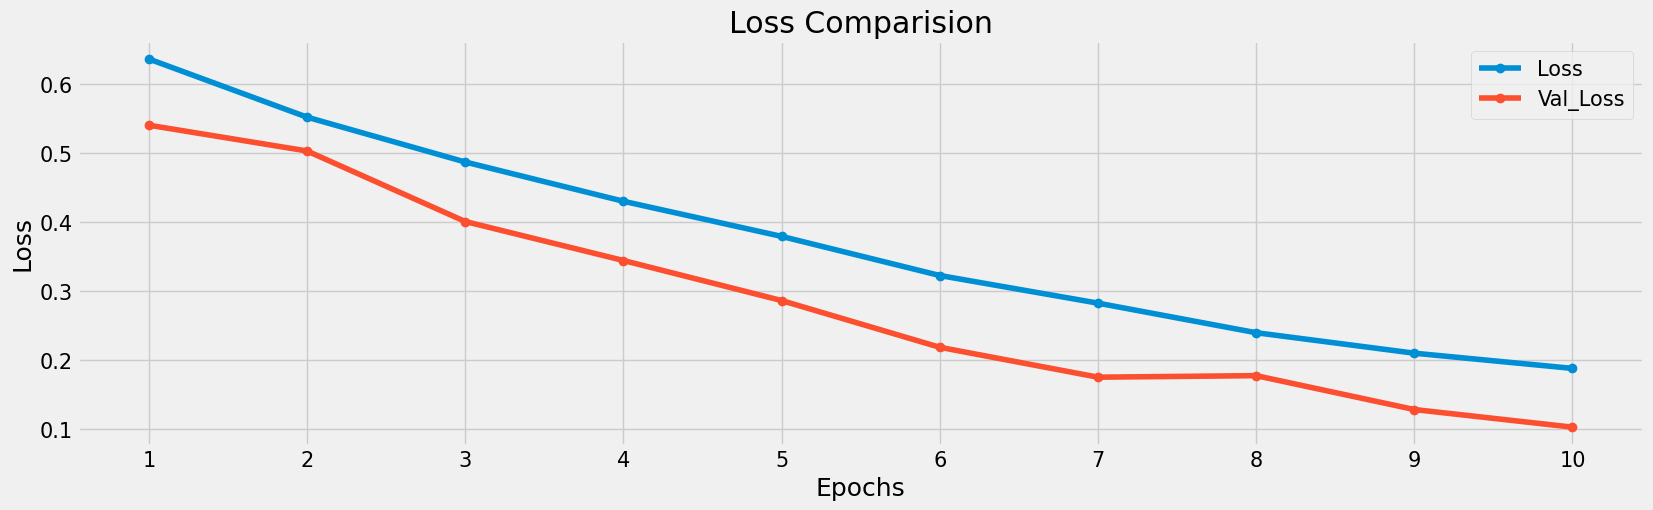

In [26]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,5))
    plt.rcParams['font.size'] = 15
    plt.plot([str(i) for i in range(1, len(history.history["accuracy"])+1)], history.history["accuracy"],label="Accuracy", marker='o')
    plt.plot([str(i) for i in range(1, len(history.history["val_accuracy"])+1)], history.history["val_accuracy"],label="Val_Accuracy", marker='o')
    plt.title(label="Accuracy Comparision")
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Accuracy")
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,5))
    plt.rcParams['font.size'] = 15
    plt.plot([str(i) for i in range(1, len(history.history["loss"])+1)], history.history["loss"],label="Loss", marker='o')
    plt.plot([str(i) for i in range(1, len(history.history["val_loss"])+1)], history.history["val_loss"],label="Val_Loss", marker='o')
    plt.title(label="Loss Comparision")
    plt.xlabel(xlabel="Epochs")
    plt.ylabel(ylabel="Loss")
    plt.legend()
    plt.show()

In [27]:
lstm_prediction=model.predict(X_test,batch_size=64,verbose=1)
print(lstm_prediction)

32/32 [==============================] - 2s 9ms/step
[[3.8551600e-03 9.9622935e-01]
 [9.9945563e-01 4.7272505e-04]
 [5.9519629e-03 9.9451846e-01]
 ...
 [8.5328788e-01 1.4219663e-01]
 [9.1968471e-01 7.3571384e-02]
 [9.9893135e-01 1.0367606e-03]]


In [28]:
lstm_pred=[]
for prediction in lstm_prediction:
    lstm_pred.append(np.argmax(prediction))
print(lstm_pred)

[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 

In [29]:
true_labels=[]
for label in y_test:
    true_labels.append(np.argmax(label))
print(true_labels)

[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

### Result Analysis

***Accuracy Score***

In [30]:
lstm_accuracy=accuracy_score(y_true=true_labels,y_pred=lstm_pred)
print(f"Validation accuracy of LongShortTermMemory is {lstm_accuracy*100.0:0.2f}%")

Validation accuracy of LongShortTermMemory is 96.75%


***Classification Report***

In [31]:
print(classification_report(y_true=true_labels,y_pred=lstm_pred,target_names=class_labels))

              precision    recall  f1-score   support

    Negative       0.97      0.96      0.97      1000
    Positive       0.97      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



***Confusion Matrix***

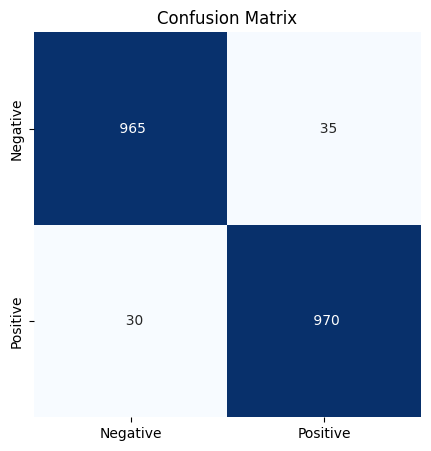

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_true=true_labels,
                                      y_pred=lstm_pred),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.show()

In [33]:
model.save("models/LongShortTermMemory_model.h5")

# Thank You